In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')

In [2]:
yf_prices = yf.download(['AAPL', 'MSFT', 'GOOG', 'FB'], start='2015-01-01')

[*********************100%***********************]  4 of 4 completed


# 1. Single Asset Simulation

In [3]:
prices = yf_prices['Adj Close']['AAPL']
rs = prices.apply(np.log).diff(1).fillna(0)

In [17]:
rs

Date
2015-01-02    0.000000
2015-01-05   -0.028576
2015-01-06    0.000094
2015-01-07    0.013925
2015-01-08    0.037703
                ...   
2020-07-15    0.006854
2020-07-16   -0.012381
2020-07-17   -0.002022
2020-07-20    0.020855
2020-07-21   -0.013898
Name: AAPL, Length: 1397, dtype: float64

In [4]:
w1 = 5
w2 = 22
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()

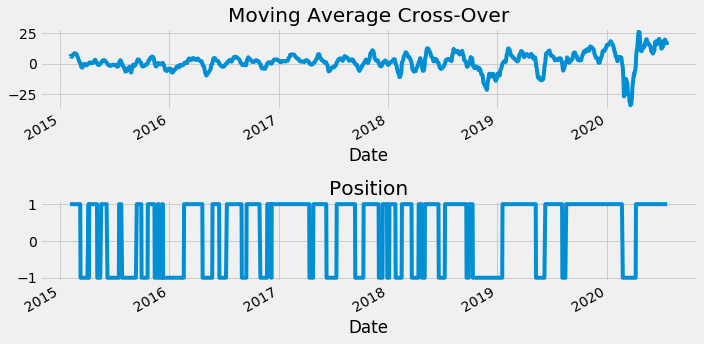

In [8]:
pos = ma_x.apply(np.sign)

fig, ax = plt.subplots(2,1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Over')
pos.plot(ax=ax[1], title='Position')
plt.savefig('tmp.png')

In [14]:
my_rs = pos.shift(1)*rs

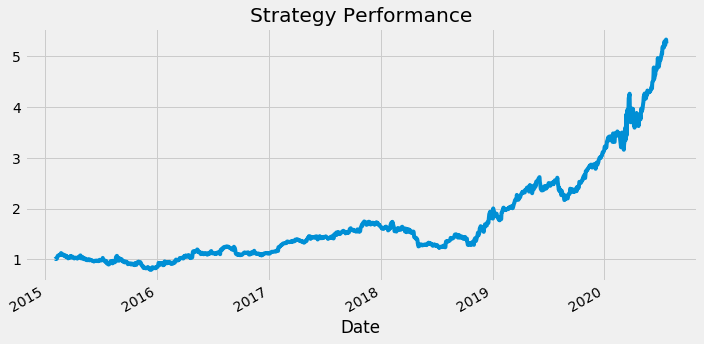

In [15]:
my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

# 2. Multi-Assets Simulation

In [19]:
prices = yf_prices['Adj Close']
rs = prices.apply(np.log).diff(1).fillna(0)

In [20]:
w1 = 5
w2 = 22
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()

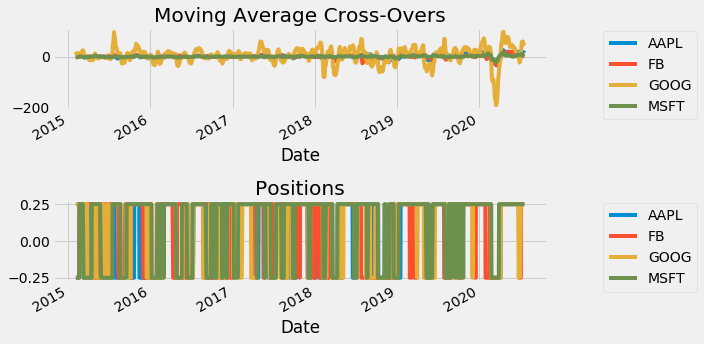

In [22]:
pos = ma_x.apply(np.sign)
pos /= pos.abs().sum(1).values.reshape(-1,1)

fig, ax = plt.subplots(2,1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Overs')
ax[0].legend(bbox_to_anchor=(1.1, 1.05))
pos.plot(ax=ax[1], title='Positions')
ax[1].legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig('tmp.png')

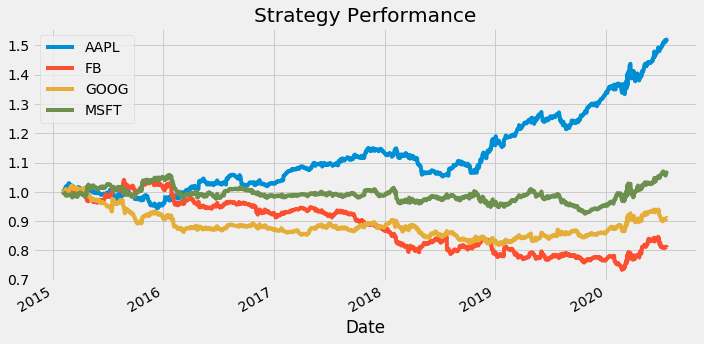

In [24]:
my_rs = (pos.shift(1)*rs)

my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

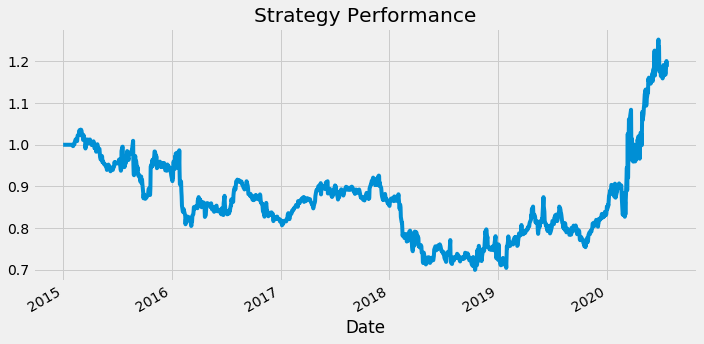

In [25]:
my_rs = (pos.shift(1)*rs).sum(1)

my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

**Look-ahead bias**

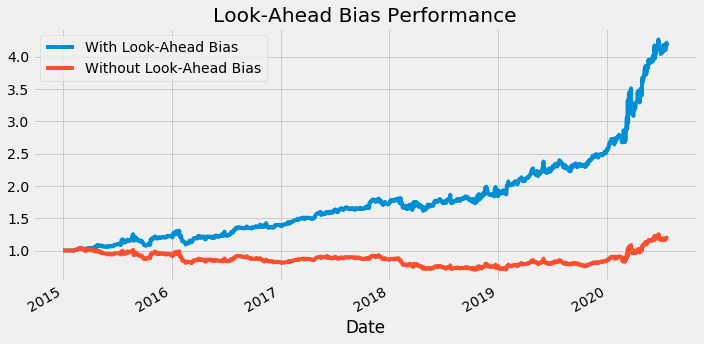

In [27]:
my_rs1 = (pos*rs).sum(1)
my_rs2 = (pos.shift(1)*rs).sum(1)

my_rs1.cumsum().apply(np.exp).plot(title='Look-Ahead Bias Performance')
my_rs2.cumsum().apply(np.exp).plot()
plt.legend(['With Look-Ahead Bias', 'Without Look-Ahead Bias'])
# rs.mean(1).cumsum().apply(np.exp).plot()
# plt.legend(['my performance', 'benchmark performance'])
plt.savefig('tmp.png')

# 3. Evaluating Strategy Robustness

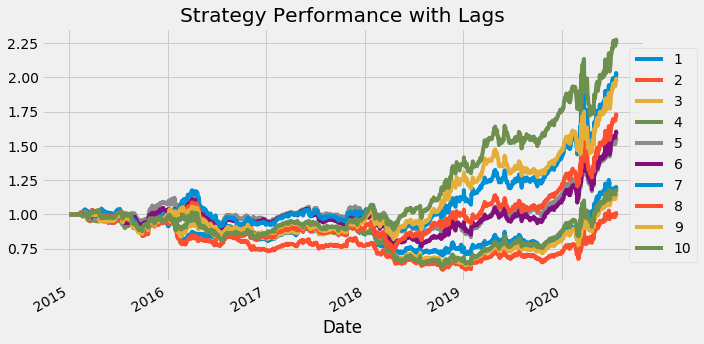

In [28]:
lags = range(1, 11)
lagged_rs = pd.Series(dtype=float, index=lags)

for lag in lags:
    my_rs = (pos.shift(lag)*rs).sum(1)
    my_rs.cumsum().apply(np.exp).plot()
    lagged_rs[lag] = my_rs.sum()

plt.title('Strategy Performance with Lags')    
plt.legend(lags, bbox_to_anchor=(1.1, 0.95))
plt.savefig('tmp.png')

# 4. Simulating Transaction Costs

In [30]:
tc_pct = 0.01

In [31]:
delta_pos = pos.diff(1).abs().sum(1)
my_tcs = tc_pct*delta_pos

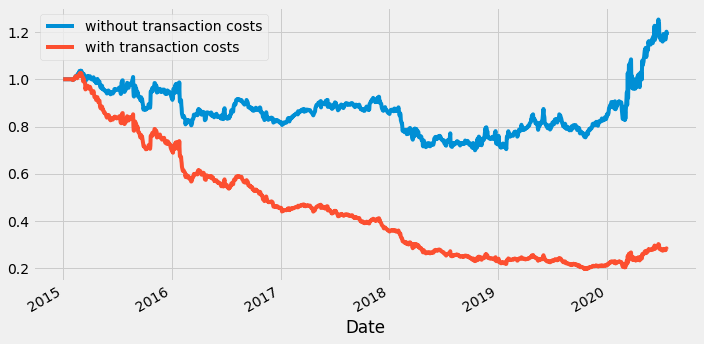

In [32]:
my_rs1 = (pos.shift(1)*rs).sum(1)
my_rs2 = (pos.shift(1)*rs).sum(1) - my_tcs

my_rs1.cumsum().apply(np.exp).plot()
my_rs2.cumsum().apply(np.exp).plot()
plt.legend(['without transaction costs', 'with transaction costs'])
plt.savefig('tmp.png')